In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# We need to use the stacks image for calculations because they require BGR, the other one is for interpretation
stacks = cv2.imread('PhotosLARC/horizontal.png')
img = cv2.cvtColor(stacks,cv2.COLOR_BGR2RGB)

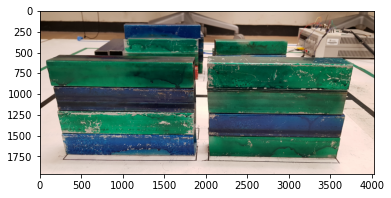

In [25]:
plt.imshow(img)

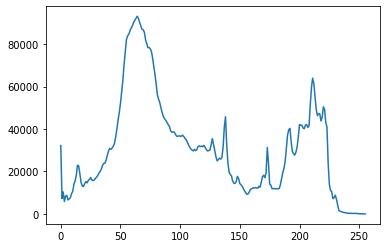

In [26]:
# Creating histogram for blue channel (BGR array)
hist_values = cv2.calcHist([stacks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

Text(0.5, 1.0, 'HISTOGRAM HORIZONTAL STACKS')

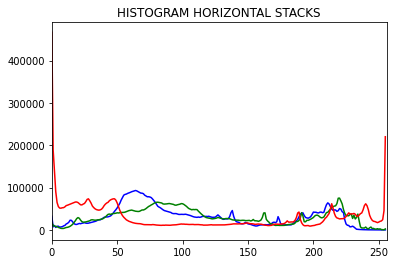

In [27]:
# Now to plot the 3 channels we use the following
color = ('b','g','r')
for i,col in enumerate(color):
    histr= cv2.calcHist([stacks],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
    
plt.title('HISTOGRAM HORIZONTAL STACKS')

In [28]:
# Creating histogram from a ROI
stacks = cv2.imread('PhotosLARC/horizontal.png')
img = cv2.cvtColor(stacks,cv2.COLOR_BGR2RGB)
img.shape

(1960, 4032, 3)

In [29]:
# First create black mask (only need x and y (we can reuse it for other color channels))

In [30]:
mask = np.zeros(img.shape[:2], np.uint8)

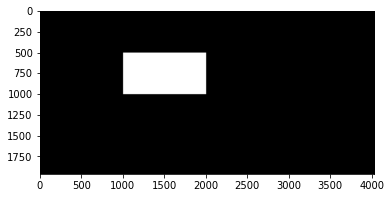

In [31]:
# Selecting a ROI for this exercise
mask[500:1000,1000:2000] = 255
plt.imshow(mask,cmap="gray")

In [32]:
# Masking image
masked_img = cv2.bitwise_and(stacks,stacks,mask=mask)
for_show = cv2.bitwise_and(img,img,mask=mask)

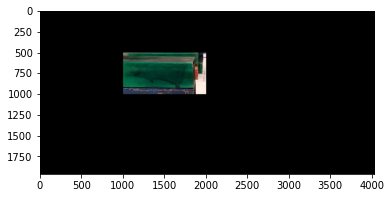

In [33]:
plt.imshow(for_show)

In [34]:
hist_mask_values_red = cv2.calcHist([stacks],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [35]:
hist_values_red = cv2.calcHist([stacks],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram Red for Masked Stacks')

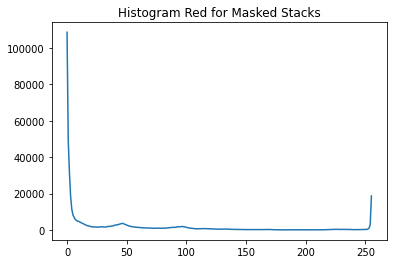

In [36]:
plt.plot(hist_mask_values_red)
plt.title('Histogram Red for Masked Stacks')

Text(0.5, 1.0, 'Histogram Red for Stacks (No mask applied)')

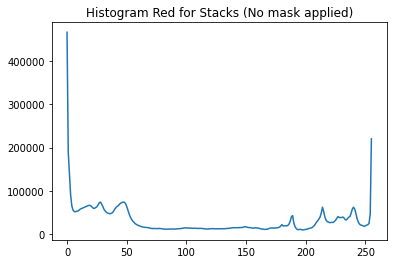

In [37]:
plt.plot(hist_values_red)
plt.title('Histogram Red for Stacks (No mask applied)')

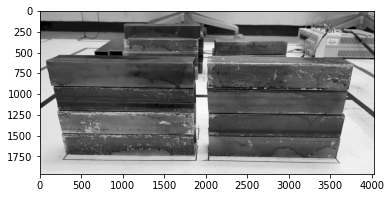

In [42]:
# Working with color equalization (adjusting contrast based on histogram)
# Image must be Grayscale!
stacks = cv2.imread('PhotosLARC/horizontal.png',0)
plt.imshow(stacks, cmap="gray")
eq_stacks = cv2.equalizeHist(stacks)

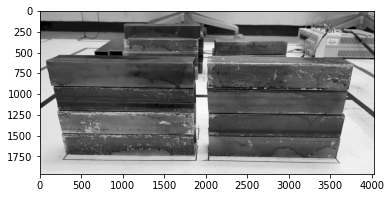

In [43]:
plt.imshow(stacks,cmap="gray")

In [45]:
# See difference between histograms (eq dicrease is shallower drop than in original img)
hist_values_eq = cv2.calcHist([eq_stacks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

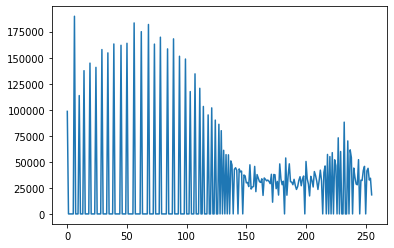

In [46]:
plt.plot(hist_values_eq)

In [47]:
hist_values_gray = cv2.calcHist([stacks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

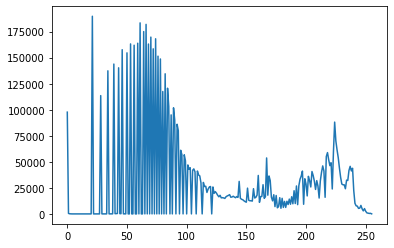

In [48]:
plt.plot(hist_values_gray)

In [ ]:
# To equalize a picture with color, we must first transform it to HSV

In [57]:
colored_stacks = cv2.imread('PhotosLARC/horizontal.png')

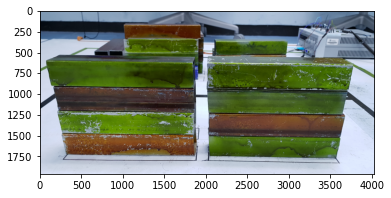

In [58]:
plt.imshow(colored_stacks)

In [59]:
hsv = cv2.cvtColor(colored_stacks,cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [60]:
eq_colored = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

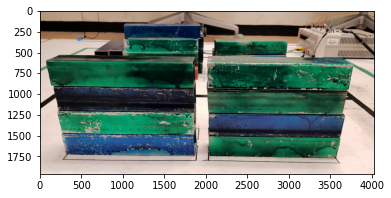

In [61]:
plt.imshow(eq_colored)